#CASO 4. MARZO

In [110]:
#!pip install elasticsearch
#!pip install eland

In [111]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "9QJVpAsI1dfU33vZpc072VTd"

# Found in the 'Manage Deployment' page
CLOUD_ID = "SeriestemporalesElastic:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQxMmRiODkwZjhhN2U0YTVjOTAwMDViODMyZjhlYWViNCRjMmU4YmQxYjkzZTI0MGY5OTZiYzIyNTFkZGMxMGY4Yg=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)

# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)

# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)

# Modificar fechas y nombres para caso
df_final_marzo_caso4 = df_final_final.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_final_marzo_caso4["anomalia_detect"] = df_final_marzo_caso4.anomaly_score_y > 0.0
df_final_marzo_caso4
df_final_marzo_caso4.to_csv("caso4_anomalias_marzo.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

In [113]:
df_anom_real = pd.read_csv("/content/caso4_marzo.csv", index_col="ds")

In [114]:
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-03-01 00:50:00,5,458.746578,442.905487,463.215648,422.595326,False,366.997262,True
2022-03-01 01:00:00,6,474.611325,457.821625,478.131786,437.511464,False,379.689060,True
2022-03-01 01:10:00,7,490.286448,472.847717,493.157878,452.537556,False,392.229159,True
2022-03-01 01:20:00,8,505.742109,487.923279,508.233440,467.613118,False,404.593687,True
2022-03-01 01:30:00,9,520.948886,502.974213,523.284374,482.664052,False,416.759108,True
...,...,...,...,...,...,...,...,...
2022-03-27 01:10:00,3751,393.116007,390.607178,410.917339,370.297017,False,393.116007,False
2022-03-27 01:20:00,3752,405.467127,403.189087,423.499248,382.878926,False,405.467127,False
2022-03-27 01:30:00,3753,417.617477,415.775116,436.085277,395.464955,False,417.617477,False


In [115]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))

Mean Absolute Error (MAE): 25.990426
Mean Squared Error (MSE): 7984.859595
Root Mean Squared Error (RMSE): 89.358042


In [116]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect))

Número de anomalías reales:  427
Número de anomalías detectadas:  324
Accuracy: 0.901093


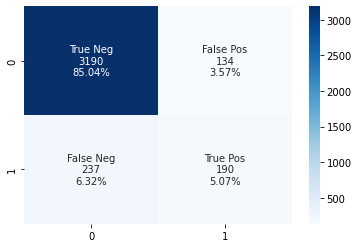

In [117]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso4_marzo.png")

In [118]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower)/np.median(df_final_marzo_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))

Amplitud de Intervalo de Confianza: 23.777344
Porcentaje Intervalo de Confianza respecto y: 5.220937 
Cuánto de desvía el Intervalo de Confianza: 18.820526


#CASO 4. JULIO

In [119]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso4 = df_final_final.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_final_julio_caso4["anomalia_detect"] = df_final_julio_caso4.anomaly_score_y > 0.0
df_final_julio_caso4.to_csv("caso4_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
df_anom_real = pd.read_csv("/content/caso4_julio.csv", index_col="ds")

In [121]:
df_anom_real = df_anom_real.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-07-01 00:50:00,5,464.068554,459.550507,471.562749,447.538265,False,371.254843,True
2022-07-01 01:00:00,6,479.873264,475.068512,487.080754,463.056270,False,383.898611,True
2022-07-01 01:10:00,7,495.478333,490.302185,502.314427,478.289943,False,396.382666,True
2022-07-01 01:20:00,8,510.854056,505.234741,517.246983,493.222499,False,408.683245,True
2022-07-01 01:30:00,9,525.971164,519.854980,531.867223,507.842738,False,420.776931,True
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,4459,242.509813,242.248047,254.260289,230.235805,False,242.509813,False
2022-07-31 23:20:00,4460,255.408067,255.478241,267.490483,243.465999,False,255.408067,False
2022-07-31 23:30:00,4461,268.391208,268.905334,280.917577,256.893092,False,268.391208,False


In [122]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))

Mean Absolute Error (MAE): 58.128058
Mean Squared Error (MSE): 8077.772447
Root Mean Squared Error (RMSE): 89.876429


In [123]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect))

Número de anomalías reales:  427
Número de anomalías detectadas:  300
Accuracy: 0.942812


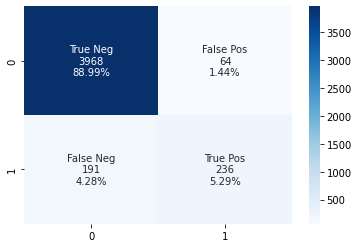

In [124]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso4_julio.png")

In [125]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower)/np.median(df_final_julio_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))

Amplitud de Intervalo de Confianza: 249.110309
Porcentaje Intervalo de Confianza respecto y: 72.516572 
Cuánto de desvía el Intervalo de Confianza: 121.017349


#CASO 2. MARZO

In [126]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "9QJVpAsI1dfU33vZpc072VTd"

# Found in the 'Manage Deployment' page
CLOUD_ID = "SeriestemporalesElastic:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQxMmRiODkwZjhhN2U0YTVjOTAwMDViODMyZjhlYWViNCRjMmU4YmQxYjkzZTI0MGY5OTZiYzIyNTFkZGMxMGY4Yg=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)
# Modificar fechas y nombres para caso
df_final_marzo_caso2 = df_final_final.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_final_marzo_caso2["anomalia_detect"] = df_final_marzo_caso2.anomaly_score_y > 0.0
df_final_marzo_caso2
df_final_marzo_caso2.to_csv("caso2_anomalias_marzo.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

In [128]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")

In [129]:
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-03-01 00:50:00,5,366.997262,368.173248,386.558923,349.787574,False,366.997262,False
2022-03-01 01:00:00,6,379.689060,380.657074,399.042748,362.271400,False,379.689060,False
2022-03-01 01:10:00,7,392.229159,393.249512,411.635186,374.863837,False,392.229159,False
2022-03-01 01:20:00,8,404.593687,405.884430,424.270104,387.498756,False,404.593687,False
2022-03-01 01:30:00,9,416.759108,418.485596,436.871270,400.099921,False,416.759108,False
...,...,...,...,...,...,...,...,...
2022-03-27 01:10:00,3751,393.116007,394.622498,413.008172,376.236823,False,393.116007,False
2022-03-27 01:20:00,3752,405.467127,407.260498,425.646172,388.874824,False,405.467127,False
2022-03-27 01:30:00,3753,417.617477,419.862976,438.248650,401.477302,False,417.617477,False


In [130]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))

Mean Absolute Error (MAE): 20.032229
Mean Squared Error (MSE): 4697.520089
Root Mean Squared Error (RMSE): 68.538457


In [131]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))

Número de anomalías reales:  432
Número de anomalías detectadas:  274
Accuracy: 0.944015


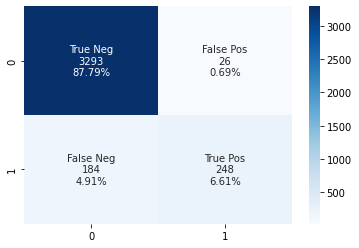

In [132]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo.png")

In [133]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower)/np.median(df_final_marzo_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))

Amplitud de Intervalo de Confianza: 15.951250
Porcentaje Intervalo de Confianza respecto y: 3.660011 
Cuánto de desvía el Intervalo de Confianza: 8.629055


#CASO 2. JULIO

In [134]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso2 = df_final_final.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_final_julio_caso2["anomalia_detect"] = df_final_julio_caso2.anomaly_score_y > 0.0
df_final_julio_caso2.to_csv("caso2_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [135]:
df_anom_real = pd.read_csv("/content/caso2_julio.csv", index_col="ds")

In [136]:
df_anom_real = df_anom_real.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
ds,,,,,,,,
2022-07-01 00:50:00,17573,371.254843,370.004791,420.682833,319.326749,False,371.254843,False
2022-07-01 01:00:00,17574,383.898611,382.933563,433.611605,332.255521,False,383.898611,False
2022-07-01 01:10:00,17575,396.382666,395.597626,446.275668,344.919584,False,396.382666,False
2022-07-01 01:20:00,17576,408.683245,407.985962,458.664004,357.307920,False,408.683245,False
2022-07-01 01:30:00,17577,420.776931,420.093872,470.771914,369.415830,False,420.776931,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,22027,242.509813,238.903198,289.581240,188.225156,False,242.509813,False
2022-07-31 23:20:00,22028,255.408067,252.158203,302.836245,201.480161,False,255.408067,False
2022-07-31 23:30:00,22029,268.391208,265.616516,316.294558,214.938474,False,268.391208,False


In [137]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))

Mean Absolute Error (MAE): 5.761354
Mean Squared Error (MSE): 138.720478
Root Mean Squared Error (RMSE): 11.777966


In [138]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect))

Número de anomalías reales:  576
Número de anomalías detectadas:  111
Accuracy: 0.893025


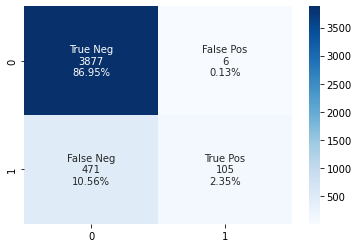

In [139]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_julio.png")

In [140]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower)/np.median(df_final_julio_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))

Amplitud de Intervalo de Confianza: 36.786933
Porcentaje Intervalo de Confianza respecto y: 7.270402 
Cuánto de desvía el Intervalo de Confianza: 27.960630
